# Task -2  :  Unsupervised Learning
# Prediction of number of clusters for Iris dataset

# Ritik Bhardwaj

# The Sparks Foundation

### -Impoting Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
sns.set_style("dark")

### Importing data

In [67]:
df = pd.read_csv("iris.csv", index_col = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Analysing data

In [56]:
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [57]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Plotting data

Text(0.5, 1.0, 'Sepal length vs Sepal width')

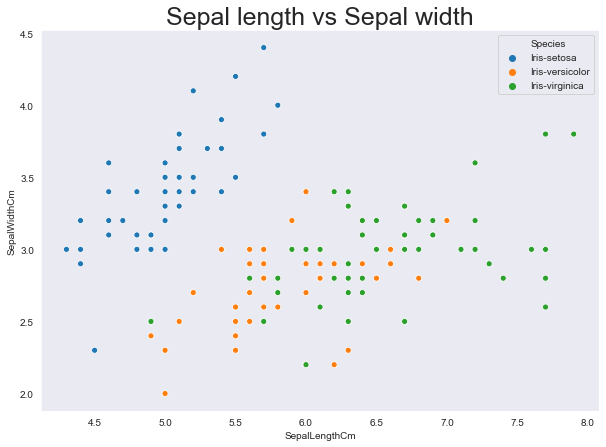

In [68]:
# Sepal length vs Sepal width
plt.figure(figsize = (10,7))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue = "Species", data = df)
plt.title("Sepal length vs Sepal width", fontsize =25)

Text(0.5, 1.0, 'Petal Length vs Petal width')

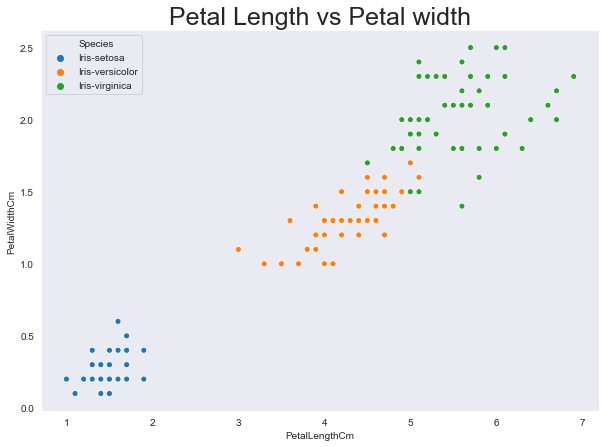

In [6]:
# Petal Length vs Petal width
plt.figure(figsize = (10,7))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data = df)
plt.title("Petal Length vs Petal width", fontsize = 25)

<AxesSubplot:>

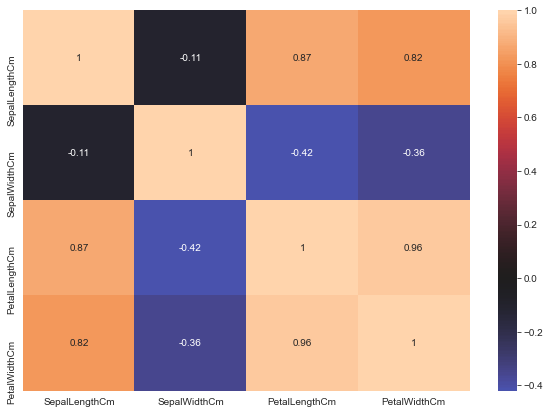

In [59]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, center = 0)

In [60]:
X = df.iloc[:,0:4].values
print(len(X))

150


### Finding suitable number of clusters using Kmeans and Elbow plot

Text(0, 0.5, 'Error')

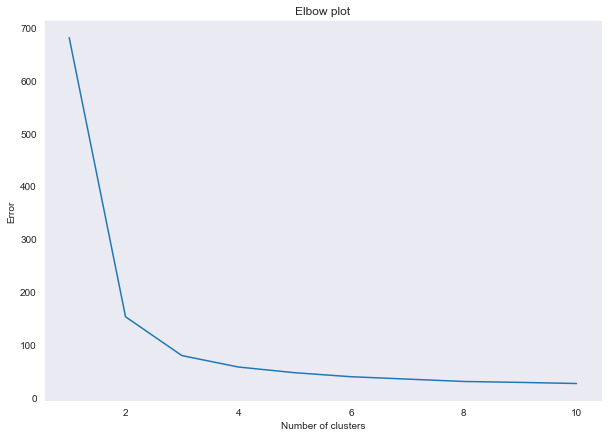

In [61]:
plt.figure(figsize = (10,7))
Error = []
for i in range(1,11):
    km = KMeans(n_clusters = i).fit(X)
    km.fit(X)
    Error.append(km.inertia_)
sns.lineplot(range(1,11), Error)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Error")

## As graph changes sharply (formation of elbow) at number of clusters  =  3, we take k = 3

In [62]:
km3 = KMeans(n_clusters = 3)
y_kmeans3 = km3.fit_predict(X)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [63]:
km3.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Visualising the clusters

Text(0, 0.5, 'Petal Width')

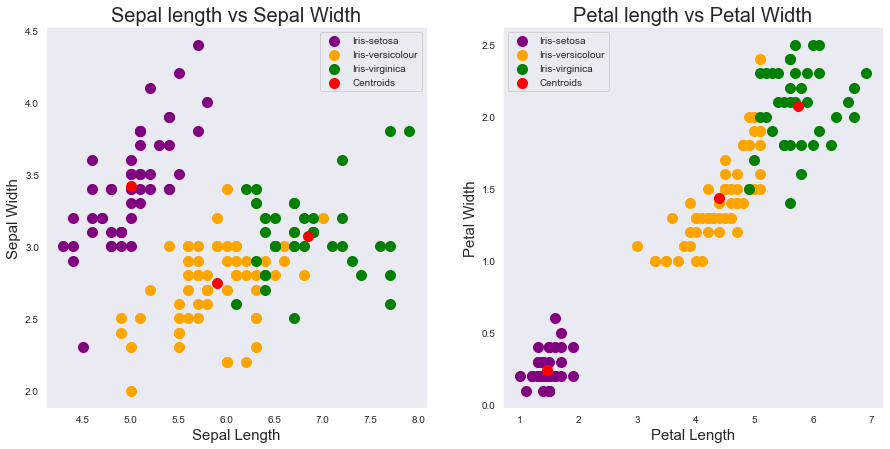

In [65]:
# For Sepal Length vs Sepal Width
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].scatter(X[y_kmeans3 == 0, 0], X[y_kmeans3 == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
axes[0].scatter(X[y_kmeans3 == 1, 0], X[y_kmeans3 == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
axes[0].scatter(X[y_kmeans3 == 2, 0], X[y_kmeans3 == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
axes[0].scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

axes[0].legend()
axes[0].set_title("Sepal length vs Sepal Width", fontsize = 20)
axes[0].set_xlabel("Sepal Length", fontsize = 15)
axes[0].set_ylabel("Sepal Width", fontsize = 15)

# For Petal length vs petal width
axes[1].scatter(X[y_kmeans3 == 0, 2], X[y_kmeans3 == 0, 3], s = 100, c = 'purple', label = 'Iris-setosa')
axes[1].scatter(X[y_kmeans3 == 1, 2], X[y_kmeans3 == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
axes[1].scatter(X[y_kmeans3 == 2, 2], X[y_kmeans3 == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
axes[1].scatter(km3.cluster_centers_[:, 2], km3.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')

axes[1].legend()
axes[1].set_title("Petal length vs Petal Width", fontsize = 20)
axes[1].set_xlabel("Petal Length", fontsize = 15)
axes[1].set_ylabel("Petal Width", fontsize = 15)

## Clusters are separated by using K_means